# Liver Model Construction: Huge Core Model

In [1]:
import os
import re
import warnings
from cobra.io import *
from cobra.io.json import *
import escher
import mass
import numpy as np
import pandas as pd
import equilibrator_api
from equilibrator_api import ComponentContribution, Q_
import sympy as sym
from cobra import Model, Reaction, Metabolite
import cobra.test
from os.path import join
from mass.util import qcqa, qcqa_model
from cobra import DictList
from mass import (
    MassConfiguration, MassMetabolite, MassModel,
    MassReaction, Simulation, UnitDefinition)
from mass.io.json import save_json_model as save_json_mass_model
from mass.visualization import plot_comparison, plot_time_profile, plot_ensemble_phase_portrait, plot_ensemble_time_profile
mass_config = MassConfiguration()
mass_config.irreversible_Keq = float("inf")
print("MASSpy version: {0}".format(mass.__version__))
from six import iteritems
import matplotlib.pyplot as plt
from mass.thermo import (
    ConcSolver, sample_concentrations,
    update_model_with_concentration_solution)
# adding Folder_2 to the system path
sys.path.insert(0, "c:\\Users\\sicil\\LiverModel")
from cobra_dict import *
import cobra_dict as c_d
import csv
import altair as alt
from minspan.minspan import minspan,nnz
import sys
# from minspan import minspan,nnz

MASSpy version: 0.1.6


In [2]:
mass.__version__

'0.1.6'

In [3]:
cobra.__version__

'0.22.1'

In [4]:
maps_dir = os.path.abspath("maps")
data_dir = os.path.abspath("data")
dir = os.path.abspath("")
model_dir = os.path.abspath("models")
minspan_dir= os.path.abspath("minspans_csv")


### Getting reactions and metabolite data from RECON 3D

In [5]:
# making dataframe of metabolites

csv_met = os.path.join(data_dir,"big_core_met_df.csv")
met_csv_df = pd.read_csv(csv_met,index_col="id")
metabolite_info=met_csv_df.to_dict(orient='index')


### Loading cobra model

In [6]:
# Initiate empty model
trial= cobra.Model()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-02


In [7]:
#  Add all the remaining metabolites involved in the pathway
for met_id, info in metabolite_info.items():
    met = cobra.Metabolite(met_id, name=info['name'], formula=info['formula'], 
                           charge=info['charge'], compartment=info['compartment'])
    trial.add_metabolites(met)
    

In [8]:
# Loading reaction data as JSON file to maintain data types as dictionaries 
rxn_json = os.path.join(data_dir,"big_core_reaction_df.json")
with open(rxn_json) as json_file:
    rxn_data = json.load(json_file)

In [9]:
for reaction, info in rxn_data.items():
    reaction_obj = cobra.Reaction(reaction)
    reaction_obj.id=reaction
    reaction= reaction_obj.id
    reaction_obj.lower_bound = info['lower_bound']
    reaction_obj.upper_bound = info['upper_bound']
    reaction_obj.name = info['name']
    trial.add_reaction(reaction_obj)
    temp=info['metabolites']
    reaction_obj.add_metabolites(temp)
    # print(reaction)

In [10]:
#Mass balance check
for r in trial.reactions:
    print(r.id,  r.check_mass_balance())

CSm {'charge': -1.0}
ACONTm {}
ICDHxm {}
AKGDm {}
SUCOASm {'charge': 2.0}
SUCD1m {}
FUMm {}
MDHm {'charge': -1.0}
NADH2_u10mi {'charge': 1.0}
FADH2ETC {}
CYOR_u10mi {'charge': -2.0}
CYOOm2i {'charge': 4.0}
ATPS4mi {'charge': -1.0}
Htmi {}
HEX1 {'charge': -1.0}
PGI {}
PFK {'charge': -1.0}
FBA {}
TPI {}
GAPD {'charge': -3.0}
PGK {}
PGM {}
ENO {}
PYK {'charge': 1.0}
ADK1 {}
PDHm {}
LDH_L {'charge': -1.0}
G6PDH2r {'charge': -1.0}
PGL {'charge': -1.0}
GND {}
RPI {}
RPE {}
TKT1 {}
TKT2 {}
TALA {}
PCm {'charge': 1.0}
PEPCKm {}
FBP {'charge': 2.0}
G6PPer {'charge': 2.0}
G6Pter {}
GLCter {}
MALtm {}
MDH {'charge': -1.0}
PEPCK_re {}
PGMT {}
GALUi {'charge': 1.0}
GLGNS1 {'charge': -3.0}
GLBRAN {}
GLPASE1 {'charge': -6.0}
GLDBRAN {}
GLPASE2 {}
GGNG {'charge': -8.0}
ACACT1m {}
HMGCOASm {'charge': 1.0}
HMGLm {}
ADCim {'charge': 1.0}
BDHm {'charge': -1.0}
OCOAT1m {}
NDPK1 {}
NDPK1m {}
NDPK2 {}
HCO3Em {'charge': -1.0}
ATPtm {}
AKGMALtm {}
ASPTA {}
ASPTAm {}
CITtam {}
CITL {}
ME2 {}
ACS {}
ARGN {}
OCBT

In [11]:
trial.reactions.G6PPer

Reaction identifier,G6PPer
Name,"Glucose-6-phosphate phosphatase, edoplasmic reticular"
Memory address,0x024d1a2c6460
Stoichiometry,g6p_r + h2o_r --> glc__D_r + pi_r D-Glucose 6-phosphate + H2O H2O --> D-Glucose + Phosphate
GPR,
Lower bound,0.0
Upper bound,1000.0


In [12]:
trial.metabolites.h_c.charge= 1
trial.metabolites.h_m.charge= 1
trial.metabolites.pi_r.charge= -2
trial.metabolites.h_i.charge= 1
trial.metabolites.pi_c.charge= -2
trial.metabolites.pi_m.charge= -2

In [13]:
for r in trial.reactions:
    print(r.id,  r.check_mass_balance())

CSm {}
ACONTm {}
ICDHxm {}
AKGDm {}
SUCOASm {}
SUCD1m {}
FUMm {}
MDHm {}
NADH2_u10mi {}
FADH2ETC {}
CYOR_u10mi {}
CYOOm2i {}
ATPS4mi {}
Htmi {}
HEX1 {}
PGI {}
PFK {}
FBA {}
TPI {}
GAPD {}
PGK {}
PGM {}
ENO {}
PYK {}
ADK1 {}
PDHm {}
LDH_L {}
G6PDH2r {}
PGL {}
GND {}
RPI {}
RPE {}
TKT1 {}
TKT2 {}
TALA {}
PCm {}
PEPCKm {}
FBP {}
G6PPer {}
G6Pter {}
GLCter {}
MALtm {}
MDH {}
PEPCK_re {}
PGMT {}
GALUi {}
GLGNS1 {}
GLBRAN {}
GLPASE1 {}
GLDBRAN {}
GLPASE2 {}
GGNG {}
ACACT1m {}
HMGCOASm {}
HMGLm {}
ADCim {}
BDHm {}
OCOAT1m {}
NDPK1 {}
NDPK1m {}
NDPK2 {}
HCO3Em {}
ATPtm {}
AKGMALtm {}
ASPTA {}
ASPTAm {}
CITtam {}
CITL {}
ME2 {}
ACS {}
ARGN {}
OCBTm {}
ARGSS {}
ARGSL {}
CBPSam {}
NH4tm {}
GDHm {}
GLNS {}
GLUN {}
ALATA_L {}
CYSO {}
3SALATAi {}
3SPYRSP {}
PGCD {}
PSERT {}
PSP_L {}
GHMT2r {}
ASNS1 {}
GLYtm {}
MLTHFtm {}
THFtm {}
KHK {}
FBA2 {}
TRIOK {}
ALCD19y {}
GLYK {}
2AMACHYD {}
SERHL {}
ALCD2x {}
ACALDtm {}
ALDD2xm {}
ACSm {}
Htm {}
O2tm {}
H2Otr {}
H2Otm {}
PItm {}
PItr {}
CO2tm {}
PPA {}
HCO

In [14]:
trial.objective = 'ATPS4mi'
flux= trial.optimize()
flux
# df= flux.to_frame()
# df.loc["EX_glc__D_c"]
# flux.loc["EX_glc__D_c"]

,fluxes,reduced_costs
CSm,2.0,0.0
ACONTm,2.0,0.0
ICDHxm,2.0,0.0
AKGDm,2.0,0.0
SUCOASm,28.0,0.0
...,...,...
EX_nh4_c,0.0,0.0
EX_so3_c,0.0,0.0
EX_etoh_c,0.0,-5.0
EX_glyc_3octa_c,0.0,0.0


In [37]:
#Function to load data from the excel sheet
def load_data(filepath, sheet_name):
    """Load Liver data from an excel sheet"""
    df = pd.read_excel(engine='openpyxl',
        io=filepath,
        sheet_name=sheet_name,
        index_col=0)
    return df

In [38]:
#Compare Results
excel_ic = os.path.join(data_dir,"Fluxes_Data.xlsx")
# ic_df = pd.read_csv(csv_ic)
# ic_df.set_index()
fluxes = load_data(
    filepath=excel_ic,
    sheet_name="Model_data"
    )
# ic_info_all.reset_index(level='ID', col_level=1, inplace=True)

fluxes

,val
met,
glygn2_c,-0.015600
ala__L_c,-0.096667
nh4_c,-0.090533
gly_c,-0.015827
gln__L_c,-0.034667
ser__L_c,-0.009720
glc__D_c,-0.037452


In [46]:
rows_of_interest = ['glygn2_c', 'glc__D_c','gly_c']
fluxes= fluxes.loc[rows_of_interest]
# fluxes = fluxes
fluxes

,val
met,
glygn2_c,-0.015600
glc__D_c,-0.037452
gly_c,-0.015827


In [47]:
print("Setting Experimental fluxes\n------------------")

for reaction in trial.reactions:
    #Setting inital condition of metabolties from HEPATOKIN  #M 
    if 'EX_' in reaction.id:
        for met in reaction.metabolites:
            # print(met)
            if met.id in fluxes.index:
                mid=met.id
                # print(mid)
                flux = fluxes.loc[mid,'val']
                # print(flux)
            #     row = [mid,ic_value]
            #     # column = [ic_value]
            #     # conc_df.append(row)
                reaction.lower_bound =  flux       
                reaction.upper_bound =  -flux     #mol/L*hr = M/hr
                
                print(reaction.id, reaction.lower_bound, reaction.upper_bound)       
# for metabolite, ic_value in liver.initial_conditions.items():
#     print("{0}: {1}".format(metabolite, ic_value))

Setting Experimental fluxes
------------------
EX_glc__D_c -0.0374517 0.0374517
EX_gly_c -0.015826666666666666 0.015826666666666666
EX_glygn2_c -0.015600000000000001 0.015600000000000001


In [48]:
trial.reactions.EX_lac__L_c.lower_bound = -1000
# trial.reactions.EX_glygn2_c.upper_bound = 0

In [49]:
for r in trial.reactions:
    if 'EX_' in r.id:
    
        print(r.id, r.lower_bound, r.upper_bound)

EX_h_c -1000.0 1000.0
EX_pyr_c 0.0 1000.0
EX_h2o_c -1000.0 1000.0
EX_pi_c -1000.0 1000.0
EX_glc__D_c -0.0374517 0.0374517
EX_lac__L_c -1000 1000.0
EX_co2_c 0.0 1000.0
EX_o2_c -1000.0 1000.0
EX_octa_prod_c 0.0 1000.0
EX_octa_cons_c 0.0 0.0
EX_urea_c 0.0 1000.0
EX_gln__L_c 0.0 1000.0
EX_acetone_c 0.0 1000.0
EX_bhb_c 0.0 1000.0
EX_glu__L_c 0.0 1000.0
EX_ser__L_c 0.0 1000.0
EX_cys__L_c 0.0 1000.0
EX_gly_c -0.015826666666666666 0.015826666666666666
EX_glygn2_c -0.015600000000000001 0.015600000000000001
EX_Tyr_ggn_c -1000.0 1000.0
EX_ala__L_c 0.0 1000.0
EX_nh4_c -1000.0 0.0
EX_so3_c 0.0 1000.0
EX_etoh_c 0.0 1000.0
EX_glyc_3octa_c 0.0 1000.0
EX_fru_c 0.0 1000.0


In [50]:
# futile_cycle_1 = trial.problem.Constraint(
#     trial.reactions.PFK.flux_expression - trial.reactions.FBP.flux_expression,
#     lb=-60,
#     ub=60)
# trial.add_cons_vars(futile_cycle_1)


# futile_cycle_2 = trial.problem.Constraint(
#     trial.reactions.HEX1.flux_expression - trial.reactions.G6PPer.flux_expression,
#     lb=-1000,
#     ub=1000)
# trial.add_cons_vars(futile_cycle_2)

# # try doubling the two above because of the 2:1 ratio
# futile_cycle_3 = trial.problem.Constraint(
#     trial.reactions.PYK.flux_expression - trial.reactions.PCm.flux_expression,
#     lb=-20,
#     ub=20)
# trial.add_cons_vars(futile_cycle_3)


# constraint = trial.problem.Constraint(-
#     trial.reactions.EX_glc__D_c.flux_expression 
#     - trial.reactions.EX_glygn2_c.flux_expression,
#     lb=-20,
#     ub=20)
# trial.add_cons_vars(constraint)

In [51]:
dual_objective = trial.problem.Objective(
    -trial.reactions.EX_glc__D_c.flux_expression+
    trial.reactions.EX_glygn2_c.flux_expression,
    direction='max')
trial.objective = dual_objective
solution = trial.optimize(objective_sense='maximise')
# try adding ratios of glycogen to glucose in objective function
# try making the flux reactons of PGI, GLUT2, 
solution

,fluxes,reduced_costs
CSm,0.075552,0.0
ACONTm,0.075552,0.0
ICDHxm,0.075552,0.0
AKGDm,0.075552,0.0
SUCOASm,-0.075552,0.0
...,...,...
EX_nh4_c,0.000000,0.0
EX_so3_c,0.000000,0.0
EX_etoh_c,0.000000,0.0
EX_glyc_3octa_c,0.000000,0.0


In [52]:
# #Escher FBA: shows the solutions on the map
initial_flux_data = {
    reaction: flux
    for reaction, flux in solution.fluxes.items()}


#view all the reactions that we need build
escher_builder = escher.Builder(
    # model=trial,
    map_json=os.path.join(
        maps_dir,"core_map_v23.json")
        # ,highlight_missing=True
    , reaction_data=initial_flux_data
    )

# Display map in notebook
escher_builder

Builder(reaction_data={'CSm': 0.075551905, 'ACONTm': 0.075551905, 'ICDHxm': 0.075551905, 'AKGDm': 0.075551905,…

In [53]:
trial.reactions.GALUi

Reaction identifier,GALUi
Name,UTP-glucose-1-phosphate uridylyltransferase (irreversible)
Memory address,0x024d1a2c6250
Stoichiometry,g1p_c + h_c + utp_c <=> ppi_c + udpg_c D-Glucose 1-phosphate + H+ + UTP C9H11N2O15P3 <=> Diphosphate + UDPglucose
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [54]:
a = solution.to_frame()
a.loc["ATPS4mi"]

fluxes           0.93839
reduced_costs    0.00000
Name: ATPS4mi, dtype: float64

In [55]:
from tqdm import tqdm
from scipy.integrate import solve_ivp

# dFBA analysis

In [ ]:
def add_dynamic_bounds(trial, y):
    """Use external concentrations to bound the uptake flux of glucose."""
    atpm, glucose = y  # expand the boundary species
    glucose_max_import = -10 * glucose / (5 + glucose)
    trial.reactions.EX_glc__D_c.lower_bound = glucose_max_import


def dynamic_system(t, y):
    """Calculate the time derivative of external species."""

    atpm, glucose = y  # expand the boundary species

    # Calculate the specific exchanges fluxes at the given external concentrations.
    with trial:
        add_dynamic_bounds(trial, y)

        cobra.util.add_lp_feasibility(trial)
        feasibility = cobra.util.fix_objective_as_constraint(trial)
        lex_constraints = cobra.util.add_lexicographic_constraints(
            trial, ['EX_glygn2_c', 'EX_glc__D_c'], ['max', 'min'])
# try max and mim 
    # Since the calculated fluxes are specific rates, we multiply them by the
    # biomass concentration to get the bulk exchange rates.
    fluxes = lex_constraints.values
    # fluxes *= atpm

    # This implementation is **not** efficient, so I display the current
    # simulation time using a progress bar.
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description('t = {:.3f}'.format(t))

    return fluxes

dynamic_system.pbar = None


def infeasible_event(t, y):
    """
    Determine solution feasibility.

    Avoiding infeasible solutions is handled by solve_ivp's built-in event detection.
    This function re-solves the LP to determine whether or not the solution is feasible
    (and if not, how far it is from feasibility). When the sign of this function changes
    from -epsilon to positive, we know the solution is no longer feasible.

    """

    with trial:

        add_dynamic_bounds(trial, y)

        cobra.util.add_lp_feasibility(trial)
        feasibility = cobra.util.fix_objective_as_constraint(trial)

    return feasibility - infeasible_event.epsilon

infeasible_event.epsilon = 1E-6
infeasible_event.direction = 1
infeasible_event.terminal = True

In [ ]:
ts = np.linspace(0, 15, 100)  # Desired integration resolution and interval
y0 = [0.1, 10]

with tqdm() as pbar:
    dynamic_system.pbar = pbar

    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )

In [ ]:
ax = plt.subplot(111)
ax.plot(sol.t, sol.y.T[:, 0])
ax2 = plt.twinx(ax)
ax2.plot(sol.t, sol.y.T[:, 1], color='r')

ax.set_ylabel('Glycogen', color='b')
ax2.set_ylabel('Glucose', color='r')

## FVA analysis

In [56]:
from cobra.flux_analysis import flux_variability_analysis

In [57]:
dual_objective = trial.problem.Objective(
    -trial.reactions.EX_glygn2_c.flux_expression-
    trial.reactions.EX_glc__D_c.flux_expression,
    direction='min')
trial.objective = dual_objective
solution = trial.optimize(objective_sense='maximise')
# try adding ratios of glycogen to glucose in objective function
# try making the flux reactons of PGI, GLUT2, 
solution

,fluxes,reduced_costs
CSm,0.10918,0.0
ACONTm,0.10918,0.0
ICDHxm,0.10918,0.0
AKGDm,0.10918,0.0
SUCOASm,-0.10918,0.0
...,...,...
EX_nh4_c,0.00000,0.0
EX_so3_c,0.00000,0.0
EX_etoh_c,0.00000,0.0
EX_glyc_3octa_c,0.00000,0.0


In [59]:
fva = flux_variability_analysis(trial, fraction_of_optimum= 0.1)
fva = fva.T
fva

# combined =trial.copy()
# data_1 = cobra.sampling.sample(combined, 5000, method = "optgp", processes = 5)

,CSm,ACONTm,ICDHxm,AKGDm,SUCOASm,SUCD1m,FUMm,MDHm,NADH2_u10mi,FADH2ETC,...,EX_cys__L_c,EX_gly_c,EX_glygn2_c,EX_Tyr_ggn_c,EX_ala__L_c,EX_nh4_c,EX_so3_c,EX_etoh_c,EX_glyc_3octa_c,EX_fru_c
minimum,0.000000,0.000000,0.000000,0.000000,-98.960147,0.000000,0.000000,-14.540419,0.000000,0.000000,...,0.0,0.000000,-0.0156,-0.0156,0.00000,-950.186778,0.0,0.0,0.0,0.0
maximum,346.438742,181.818182,181.818182,101.694915,1000.000000,101.694915,333.449397,1000.000000,564.200662,101.694915,...,0.0,0.015827,0.0156,0.0156,950.08294,0.000000,0.0,0.0,0.0,0.0


In [60]:
# combined =trial.copy()
data_1 = cobra.sampling.sample(trial, 5000, method = "optgp", processes = 5)

Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpyov2aa4t.lp
Reading time = 0.02 seconds
: 179 rows, 374 columns, 1420 nonzeros


Text(0.5, 0, 'EX_glc__D_c flux')

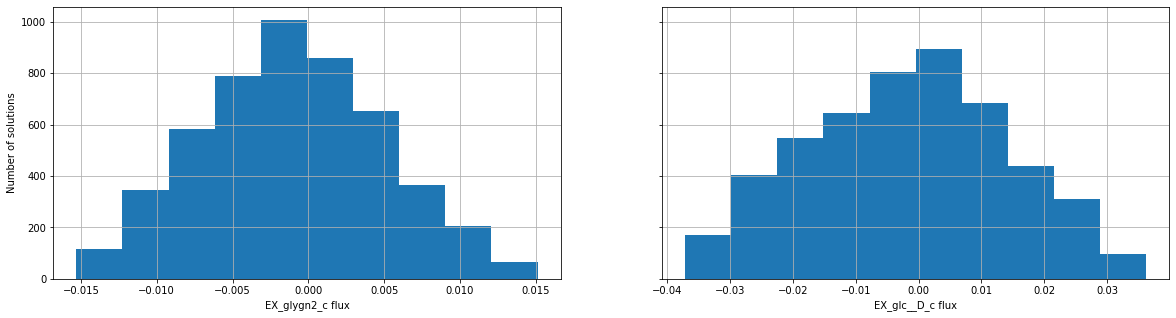

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
ax = axes[0]
data_1['EX_glygn2_c'].hist(ax=ax)
ax.set_xlabel('EX_glygn2_c flux')
ax.set_ylabel('Number of solutions')

ax = axes[1]
ax = data_1['EX_glc__D_c'].hist(ax=ax)
ax.set_xlabel('EX_glc__D_c flux')

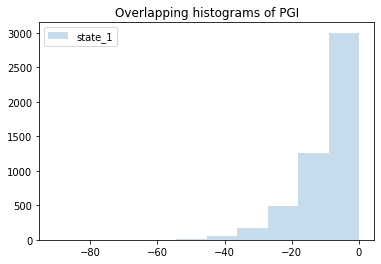

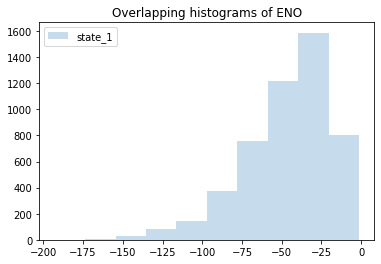

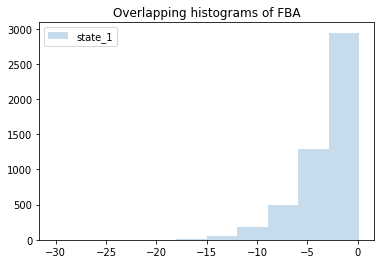

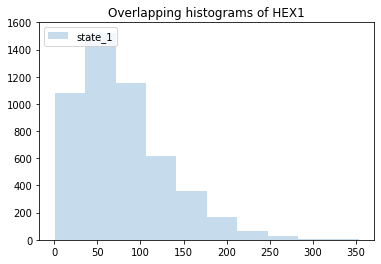

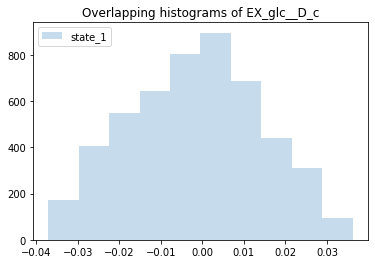

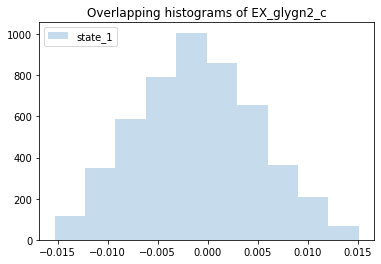

In [62]:
list_rxn =['PGI', 'ENO', "FBA", "HEX1", "EX_glc__D_c", "EX_glygn2_c"]
# #  GAPDH, ENO, FBA, PGI, PGMT
for i in list_rxn:
    plt.hist(data_1[i], 
         alpha=0.25, # the transaparency parameter
         label='state_1')
#     x_position = mean_flux.loc[i, "mean"]
    
    plt.legend(loc='upper left')
    plt.title('Overlapping histograms of '+str(i))
    plt.show()

In [ ]:
def plot_fva(atpm_values, max_pfk_values, max_fbp_values, min_pfk_values, min_fbp_values):
    """
    Parameters
    ----------
    atpm_values : list
        list of ATPM flux values from 0 to max
        
    max_g6pdh_values : list
        list of maximum G6PDH2r flux values at the ATPM fluxes in atpm_values
    max_pgi_values : list
        list of maximum PGI flux values at the ATPM fluxes in atpm_values

    min_g6pdh_values : list 
        list of minimum G6PDH2r flux values at the ATPM fluxes in atpm_values

    min_pgi_values : list
        list of minimum PGI flux values at the ATPM fluxes in atpm_values

    """
    plt.fill_between(atpm_values, max_pfk_values, min_pfk_values, 
                     label='Glcyogen', alpha=.7)
    plt.fill_between(atpm_values, max_fbp_values, min_fbp_values, 
                     label='Glucose', alpha=.7)
    plt.legend()
    plt.xlabel('Glucose and Glycogen flux')
    plt.ylabel('Range of possible fluxes')

In [ ]:
var_rxn = 'PGMT'
var_rxn_2 = 'PGI'
rxn = 'EX_glc__D_c'
trial.objective = rxn
obj = trial.optimize().objective_value
bounds = np.linspace(0, obj, 10)
lower = []
upper = []
lower_2 = []
upper_2 = []
for bound in bounds:
    trial.reactions.get_by_id(rxn).upper_bound = bound
    trial.reactions.get_by_id(rxn).lower_bound = bound


    trial.objective = var_rxn
    lower.append(trial.optimize('minimize').objective_value)
    upper.append(trial.optimize().objective_value)
    trial.objective = var_rxn_2
    upper_2.append(trial.optimize('minimize').objective_value)
    lower_2.append(trial.optimize().objective_value)
    
    trial.reactions.get_by_id(rxn).lower_bound = 0


plot_fva(bounds, upper, upper_2, lower, lower_2)

### Making Df of metabolites and reactions, exporting them, and importing to form MASS model

In [ ]:
from cobra_dict import metabolite_to_dict as metabolite_to_dict
from cobra_dict import reaction_to_dict as reaction_to_dict

In [ ]:
# met_df=pd.DataFrame()
# for met in trial.metabolites:
#     cobra_met= trial.metabolites.get_by_id(met.id)
#     m=metabolite_to_dict(cobra_met)
#     df_2=pd.DataFrame.from_dict(m,orient='index')
#     df_2=df_2.T
#     met_df=pd.concat([met_df, df_2])
# met_df=met_df.set_index('id')
# met_df

In [ ]:
# csv_met_cobra = os.path.join(data_dir,"core_cobra_met.csv")
# met_df.to_csv(csv_met_cobra)

In [ ]:
# reaction_list=[]
# # metabolite_list=[]
# for rid in trial.reactions:
#     reaction_list.append(rid.id)

In [ ]:
# metabolite_list=[]
# met_df=pd.DataFrame()
# rxn_df=pd.DataFrame()
# reactions_not_in_r3d=[]
# for rxn in reaction_list:
#     if rxn in R3D.reactions:
#         if rxn == "DGAT":
#             reaction = core.reactions.get_by_id(rxn)
#             r=reaction_to_dict(reaction)
#             reactions_not_in_r3d.append(rxn)
#             print("ahaha gochu")
#         else:
#             reaction= R3D.reactions.get_by_id(rxn)
#             r=reaction_to_dict(reaction)    
#     else:
#         reaction = core.reactions.get_by_id(rxn)
#         r=reaction_to_dict(reaction)
#         reactions_not_in_r3d.append(rxn)

#     df=pd.DataFrame.from_dict(r,orient='index')
#     df=df.T
#     rxn_df= pd.concat([rxn_df, df])
#     for met in reaction.metabolites:
#         if met.id not in metabolite_list:
#             if met.id in R3D.metabolites:
#                 metabolite= R3D.metabolites.get_by_id(met.id)
#                 m=metabolite_to_dict(metabolite)

#             else:
#                 metabolite = core.metabolites.get_by_id(met.id)
#                 m=metabolite_to_dict(metabolite)
#             # print(met.id)
#             metabolite_list.append(met.id)
#             df_2=pd.DataFrame.from_dict(m,orient='index')
#             df_2=df_2.T
#             met_df= pd.concat([met_df, df_2])


# rxn_df=rxn_df.set_index('id')
# met_df=met_df.set_index('id')
# rxn_df
# reactions_not_in_r3d

In [ ]:
# json_rxn_cobra = os.path.join(data_dir,"core_cobra_rxn.json")
# rxn_df.to_json(json_rxn_cobra,orient="index")

## Making MASS model of glycolysis

In [108]:
liver= MassModel("Core_Model", array_type='DataFrame', dtype=np.int64)

#### Add the pathway metabolites and their information to a new MASS model from COBRA model

In [109]:
csv_met = os.path.join(data_dir,"small_core_met_df.csv")
json_rxn = os.path.join(data_dir,"small_core_reaction_df.json")

In [110]:
# making dataframe of metabolites
import json
met_csv_df = pd.read_csv(csv_met,index_col="id")
mass_metabolite_info=met_csv_df.to_dict(orient='index')

# Loading reaction data as JSON file to maintain data types as dictionaries 

with open(json_rxn) as json_file:
    mass_rxn_data = json.load(json_file)

In [111]:
mass_metabolite_info

{'pep_c': {'name': 'Phosphoenolpyruvate',
  'charge': -3,
  'formula': 'C3H2O6P',
  'compartment': 'c'},
 'pep_m': {'name': 'Phosphoenolpyruvate',
  'charge': -3,
  'formula': 'C3H2O6P',
  'compartment': 'm'},
 'pi_c': {'name': 'Phosphate',
  'charge': 0,
  'formula': 'HO4P',
  'compartment': 'c'},
 'pi_m': {'name': 'Phosphate',
  'charge': 0,
  'formula': 'HO4P',
  'compartment': 'm'},
 'co2_m': {'name': 'CO2 CO2',
  'charge': 0,
  'formula': 'CO2',
  'compartment': 'm'},
 'gdp_m': {'name': 'GDP C10H12N5O11P2',
  'charge': -3,
  'formula': 'C10H12N5O11P2',
  'compartment': 'm'},
 'gtp_m': {'name': 'GTP C10H12N5O14P3',
  'charge': -4,
  'formula': 'C10H12N5O14P3',
  'compartment': 'm'},
 'oaa_m': {'name': 'Oxaloacetate',
  'charge': -2,
  'formula': 'C4H2O5',
  'compartment': 'm'},
 'adp_c': {'name': 'ADP C10H12N5O10P2',
  'charge': -3,
  'formula': 'C10H12N5O10P2',
  'compartment': 'c'},
 'atp_c': {'name': 'ATP C10H12N5O13P3',
  'charge': -4,
  'formula': 'C10H12N5O13P3',
  'compartme

In [112]:
#  Add all the remaining metabolites involved in the pathway
for met_id, info in mass_metabolite_info.items():
    met = MassMetabolite(met_id, name=info['name'], formula=info['formula'], 
                           charge=info['charge'], compartment=info['compartment'])
    # print(met.compartment)
    liver.add_metabolites(met)

In [113]:
for reaction, info in mass_rxn_data.items():
    if reaction in trial.reactions:
        reaction_obj = MassReaction(reaction)
        reaction_obj.id = reaction
        reaction= reaction_obj.id
        reaction_obj.lower_bound = info['lower_bound']
        reaction_obj.upper_bound = info['upper_bound']
        reaction_obj.name = info['name']
        liver.add_reactions(reaction_obj)
        temp=info['metabolites']
        reaction_obj.add_metabolites(temp)
        print(reaction)

PEPtm
PEPCKm
PYK
PCm
LDH_L
PGMT
GLPASE2
GLDBRAN
GLBRAN
GLPASE1
GLGNS1
GGNG
GALUi
ADK1
NADH2_u10mi
FADH2ETC
CYOR_u10mi
CYOOm2i
ATPS4mi
Htmi
CSm
ACONTm
ICDHxm
AKGDm
SUCOASm
SUCD1m
FUMm
MDHm
PDHm
FBP
MALtm
MDH
PEPCK_re
HCO3Em
ATPtm
AKGMALtm
ASPTA
ASPTAm
PYRt2m
ASPGLUm
Htm
O2tm
H2Otm
PItm
CO2tm
EX_co2_c
EX_o2_c
EX_h_c
EX_h2o_c
EX_pi_c
NDPK1m
NDPK1
ATPM
HEX1
PGI
PFK
FBA
TPI
GAPD
PGK
PGM
ENO
EX_glc__D_c
EX_lac__L_c
G6PDH2r
PGL
GND
RPI
RPE
TKT1
TKT2
TALA


In [114]:
liver.reactions.PGK.reverse_stoichiometry(inplace=True)
liver.reactions.PGM.reverse_stoichiometry(inplace=True)

Reaction identifier,PGM
Name,Phosphoglycerate mutase
Memory address,0x024d22641fa0
Subsystem,
Kinetic Reversibility,True
Stoichiometry,3pg_c <=> 2pg_c 3-Phospho-D-glycerate <=> D-Glycerate 2-phosphate
GPR,
Bounds,"(-1000.0, 1000.0)"


In [115]:
from mass.io import json, sbml

In [116]:
mass_small_core = os.path.join(model_dir,"Mass_small_core_model.json")
json.save_json_model(mass_model=liver, filename=mass_small_core)

## Setting initial conditions

In [117]:
import csv
import openpyxl

In [118]:
#Function to load data from the excel sheet
def load_data(filepath, sheet_name):
    """Load Liver data from an excel sheet"""
    df = pd.read_excel(engine='openpyxl',
        io=filepath,
        sheet_name=sheet_name,
        index_col=0)
    return df

In [119]:
#Compare Results
excel_ic = os.path.join(data_dir,"Concentrations2.xlsx")
# ic_df = pd.read_csv(csv_ic)
# ic_df.set_index()
ic_info_all = load_data(
    filepath=excel_ic,
    sheet_name="Concentrations")
ic_info_all.reset_index(level='ID', col_level=1, inplace=True)
ic_info_all

,ID,Name,Concentration (mM),Concentration (M),Additional Notes
0,13dpg_c,3-Phospho-D-glyceroyl phosphate,0.000243,2.430000e-07,DATA Source:HEPATOKIN
1,2pg_c,D-Glycerate 2-phosphate/ 2-\nPhosphoglycerate,0.110561,1.105609e-04,NaN
2,3pg_c,3-Phospho-D-glycerate/ 3-\nPhosphoglycerate,0.520630,5.206305e-04,NaN
3,aacoa_m,Acetoacetyl-CoA,0.000608,6.083800e-07,NaN
4,ac_c,Acetate,1.057460,1.057460e-03,NaN
...,...,...,...,...,...
80,udp_c,UDP C9H11N2O12P2,0.315888,3.158882e-04,NaN
81,udpg_c,UDPglucose,0.679781,6.797807e-04,NaN
82,urea_c,Urea CH4N2O,31.939803,3.193980e-02,NaN
83,utp_c,UTP C9H11N2O15P3,0.882147,8.821469e-04,NaN


In [120]:
conc_df =pd.DataFrame(ic_info_all.loc[:,["ID","Concentration (M)"]])
conc_df.set_index('ID',drop=True,inplace=True)
conc_df

,Concentration (M)
ID,
13dpg_c,2.430000e-07
2pg_c,1.105609e-04
3pg_c,5.206305e-04
aacoa_m,6.083800e-07
ac_c,1.057460e-03
...,...
udp_c,3.158882e-04
udpg_c,6.797807e-04
urea_c,3.193980e-02


In [121]:
# new_index= []
# for i in conc_df.index:
#     base = conc_df.index.get_loc(i)
#     # print(base)
#     # l = len(i)
#     # new = i[:l-2]
#     # new_index.append(new)
#     # print(new)
#     # conc_df.index.get_loc(base) = new
#     # new_id = i.rpartition("_" + str(met.compartment))[0]

# conc_df= conc_df.reset_index(drop=True)
# conc_df["ID"] = new_index
# conc_df.set_index('ID',drop=True,inplace=True)
# conc_df

In [122]:
print("Initial Conditions\n------------------")

for reaction in liver.reactions:
    #Setting inital condition of metabolties from HEPATOKIN  #M 
    for met in reaction.metabolites:
        if met.id in conc_df.index:
            mid=met.id
            metabolite = reaction.metabolites
            ic_value = conc_df.loc[mid,'Concentration (M)']
            # print(ic_value)
            # row = [mid,ic_value]
            # column = [ic_value]
            # conc_df.append(row)
            met.ic =  ic_value    
                    
for metabolite, ic_value in liver.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))

Initial Conditions
------------------
pep_c: 0.00031
pep_m: 0.0020499999999999997
pi_c: 0.0064
pi_m: 0.00045
oaa_m: 3.119e-05
adp_c: 0.00199495195
atp_c: 0.004727145980000001
pyr_c: 0.00047999999999999996
adp_m: 0.008038905800000001
atp_m: 0.00919
pyr_m: 0.00134
lac__L_c: 0.00326183772
nad_c: 0.00182530972
nadh_c: 4.63542e-06
g1p_c: 0.000134490625
g6p_c: 0.00014000000000000001
glc__D_c: 0.01048280703
udp_c: 0.00031588815999999997
udpg_c: 0.0006797807
utp_c: 0.00088214693
amp_c: 0.000365
nad_m: 8.33773e-06
nadh_m: 0.000288577105
accoa_m: 0.001373201
cit_m: 0.0060226752
coa_m: 0.0015432010000000001
icit_m: 4.2000000000000004e-05
akg_m: 0.001605
succoa_m: 0.00013000000000000002
succ_m: 0.000633435475
fum_m: 0.0084280308
mal__L_m: 0.002703530905
f6p_c: 0.00012713765
fdp_c: 5.1470825e-05
mal__L_c: 0.001522
oaa_c: 1.44886e-06
akg_c: 0.000638181795
asp__L_c: 0.008545
glu__L_c: 0.007055
asp__L_m: 0.0037829256
glu__L_m: 0.013795
dhap_c: 0.00017689737
g3p_c: 8.783869999999999e-06
13dpg_c: 2.43e-

### Getting Standard and Physiological Gibbs energies of reactions to get Keq of reactions

In [123]:
met_list = []

for reaction in liver.boundary_conditions:
    print(reaction)

In [124]:
excluded_reactions=["ATPM", "NADHM","PYRt2m","PEPtm"]


In [125]:
for reaction in liver.boundary:
    excluded_reactions.append(reaction.id)
    reaction.Keq=1    # Setting Keq
    print(reaction,reaction.Keq)

EX_co2_c: co2_c <=>  1
EX_o2_c: o2_c <=>  1
EX_h_c: h_c <=>  1
EX_h2o_c: h2o_c <=>  1
EX_pi_c: pi_c <=>  1
EX_glc__D_c: glc__D_c <=>  1
EX_lac__L_c: lac__L_c <=>  1


In [126]:
# Reactions that we don't want to get Keq from equilibrator [exchanges and psuedoreactions] SET THESE MANUALLY
# Setting Keq and kf for boundary reactions
print("Boundary Reactions and Values\n-----------------------------")

for reaction in liver.boundary:
    excluded_reactions.append(reaction.id)
    reaction.Keq=1    # Setting Keq
    reaction.kf=1e6     # Setting kf
    #Setting boundary condition metabolties from ic of metabolite from HEPATOKIN   
    for met in reaction.reactants:
        if met.id in conc_df.index:
            mid=met.id
            boundary_met = reaction.boundary_metabolite
            bcvalue = conc_df.loc[mid,'Concentration (M)']
            liver.boundary_conditions[boundary_met] =  bcvalue
            bc_value = liver.boundary_conditions.get(boundary_met)
            print("{0}\n{1}: {2}\n".format(reaction, boundary_met, bc_value))

Boundary Reactions and Values
-----------------------------
EX_pi_c: pi_c <=> 
pi_b: 0.0064

EX_glc__D_c: glc__D_c <=> 
glc__D_b: 0.01048280703

EX_lac__L_c: lac__L_c <=> 
lac__L_b: 0.00326183772



In [127]:
reaction_str= []
cc = ComponentContribution()
# optional: changing the aqueous environment parameters
cc.p_h = Q_(7.4)
cc.p_mg = Q_(3.31)
cc.ionic_strength = Q_("0.144M")


cc.temperature = Q_("310.15K")
R = 0.00831446261815324 #R = 0.00831446261815324 kJ/mol
from numpy import *
Keq_df=pd.DataFrame(columns=["Reaction","Keq"])
# Keq_df

In [128]:
# Getting Keq from equilibrator by forming a reaction string that it can parse through
for reaction in liver.reactions:
    if reaction.id not in excluded_reactions:
        reactants = []
        #forming reaction string 
        for met in reaction.reactants:
            id_coeff= reaction.get_coefficient(met)
            new_id = met.id
            new_id = met.id.rpartition("_" + str(met.compartment))[0] #removing compartment lettes, for eg "_c"
            if id_coeff == 1 or id_coeff == -1:
                new_id = "bigg.metabolite:" + new_id
            else:
                new_id = str(id_coeff) + " bigg.metabolite:" + new_id

            reactants.append(new_id)   
        reactants_string= " + ".join(reactants)
        reactants_string = str(reactants_string + " = ")

        # Forming product string
        products = []
        for met in reaction.products:
            new_id = met.id
            new_id = met.id.rpartition("_" + str(met.compartment))[0] # removing compartment lettes, for eg "_c"
            new_id = "bigg.metabolite:" + new_id
            products.append(new_id)   
        products_string= " + ".join(products)

        #final reaction to parse
        reaction_to_parse = reactants_string + products_string         
        # print(reaction_to_parse)
        rxn_parsed = cc.parse_reaction_formula(reaction_to_parse)
        print(reaction.id)

        #Getting Gibbs energies
        dG0_prime = cc.standard_dg_prime(rxn_parsed)
    #         print(f"ΔG'° = {dG0_prime}")
        dGm_prime = cc.physiological_dg_prime(rxn_parsed)
        dG_prime_value_in_kj_per_mol = dGm_prime.value.m_as("kJ/mol")
        dG0prime_value_in_kj_per_mol = dG0_prime.value.m_as("kJ/mol")
    #     print(f"ΔG'm = {dG_prime_value_in_kj_per_mol}")
        delG = dG_prime_value_in_kj_per_mol

        # Calculating Keq from delG
        a = exp(-delG/ (R*310.15)) 
        reaction.Keq = a
        print(f"Keq = {a}")
#         list_keq=[reaction,a]
#         rxn_keq=pd.DataFrame(list_keq)
        # df = pd.DataFrame([[reaction,a]], columns=["Reaction","Keq"])
        # Keq_df.append(df)

# Keq_df    

PEPCKm
Keq = 5.8718785452391975
PYK
Keq = 10333.2896179346
PCm
Keq = 26.659254851731617
LDH_L
Keq = 0.00013815091719569572
PGMT
Keq = 17.38993802024133
GLPASE2


c:\Users\sicil\miniconda3\envs\massliver\lib\site-packages\equilibrator_cache\reaction.py:616 UserWarning: Cannot calculate Legendre transform for Compound(id=9140, inchi_key=None): Compound(id=9140, inchi_key=None) has not yet been analyzed by ChemAxon.
c:\Users\sicil\miniconda3\envs\massliver\lib\site-packages\equilibrator_cache\reaction.py:616 UserWarning: Cannot calculate Legendre transform for Compound(id=117375, inchi_key=None): Compound(id=117375, inchi_key=None) has not yet been analyzed by ChemAxon.


Keq = 3.165710190166884e-193
GLDBRAN
Keq = 6.412758550539538e-73
GLBRAN


c:\Users\sicil\miniconda3\envs\massliver\lib\site-packages\equilibrator_cache\reaction.py:616 UserWarning: Cannot calculate Legendre transform for Compound(id=9805, inchi_key=None): Compound(id=9805, inchi_key=None) has not yet been analyzed by ChemAxon.
c:\Users\sicil\miniconda3\envs\massliver\lib\site-packages\equilibrator_cache\reaction.py:616 UserWarning: Cannot calculate Legendre transform for Compound(id=9139, inchi_key=None): Compound(id=9139, inchi_key=None) has not yet been analyzed by ChemAxon.
c:\Users\sicil\miniconda3\envs\massliver\lib\site-packages\equilibrator_cache\reaction.py:616 UserWarning: Cannot calculate Legendre transform for Compound(id=7041, inchi_key=None): Compound(id=7041, inchi_key=None) has not yet been analyzed by ChemAxon.
c:\Users\sicil\miniconda3\envs\massliver\lib\site-packages\equilibrator_cache\reaction.py:616 UserWarning: Cannot calculate Legendre transform for Compound(id=9837, inchi_key=None): Compound(id=9837, inchi_key=None) has not yet been an

Keq = 1.0
GLPASE1
Keq = 8.535606994636346e-92
GLGNS1
Keq = 0.0
GGNG
Keq = 0.0
GALUi
Keq = 1.2436652248701425
ADK1
Keq = 2.412316406985432e-235
NADH2_u10mi
Keq = 1.1097827514444105e+22
FADH2ETC
Keq = 5.023025404471424e+19
CYOR_u10mi


c:\Users\sicil\miniconda3\envs\massliver\lib\site-packages\equilibrator_cache\reaction.py:616 UserWarning: Cannot calculate Legendre transform for Compound(id=4914, inchi_key=None): Compound(id=4914, inchi_key=None) has not yet been analyzed by ChemAxon.
c:\Users\sicil\miniconda3\envs\massliver\lib\site-packages\equilibrator_cache\reaction.py:616 UserWarning: Cannot calculate Legendre transform for Compound(id=704, inchi_key=None): Compound(id=704, inchi_key=None) has not yet been analyzed by ChemAxon.


Keq = 1.0737921585425147e+24
CYOOm2i
Keq = 0.0009020643675317233
ATPS4mi
Keq = 5.976530315538269e-09
Htmi
Keq = 1.0
CSm
Keq = 3825036.234120267
ACONTm
Keq = 0.08298137980719675
ICDHxm
Keq = 132.56877597611685
AKGDm
Keq = 42244.831063136786
SUCOASm
Keq = 1.4643104514453096
SUCD1m
Keq = 4.997902379212323e-08
FUMm
Keq = 3.772878492916711
MDHm
Keq = 4.7812151480308246e-05
PDHm
Keq = 557041.79687703
FBP
Keq = 115004.76795942851
MALtm
Keq = 1.0
MDH
Keq = 4.7812151480308246e-05
PEPCK_re
Keq = 5.8718785452391975
HCO3Em
Keq = 33.18076124208141
ATPtm
Keq = 1.0
AKGMALtm
Keq = 1.0
ASPTA
Keq = 0.33333387781666934
ASPTAm
Keq = 0.33333387781666934
ASPGLUm
Keq = 1.0
Htm
Keq = 1.0
O2tm
Keq = 1.0
H2Otm
Keq = 1.0
PItm
Keq = 1.0
CO2tm
Keq = 1.0
NDPK1m
Keq = 3.117459754364046
NDPK1
Keq = 3.117459754364046
HEX1
Keq = 4959.419292148073
PGI
Keq = 0.34798040939490554
PFK
Keq = 1454.9063091036724
FBA
Keq = 0.1620181301040788
TPI
Keq = 0.11365701527311964
GAPD
Keq = 0.0006723795415727605
PGK
Keq = 1943.529892008

In [129]:
weird_rxn = ["GLGNS1", 'GGNG', 'ATPM', 'PEPtm', 'PYRt2m']
for r in weird_rxn:
    reaction_obj = liver.reactions.get_by_id(r)
    reaction_obj.Keq = 1

In [130]:
print("Equilibrium Constants\n---------------------")
for reaction in liver.reactions:
    print("{0}: {1}".format(reaction.Keq_str, reaction.Keq))

Equilibrium Constants
---------------------
Keq_PEPtm: 1
Keq_PEPCKm: 5.8718785452391975
Keq_PYK: 10333.2896179346
Keq_PCm: 26.659254851731617
Keq_LDH_L: 0.00013815091719569572
Keq_PGMT: 17.38993802024133
Keq_GLPASE2: 3.165710190166884e-193
Keq_GLDBRAN: 6.412758550539538e-73
Keq_GLBRAN: 1.0
Keq_GLPASE1: 8.535606994636346e-92
Keq_GLGNS1: 1
Keq_GGNG: 1
Keq_GALUi: 1.2436652248701425
Keq_ADK1: 2.412316406985432e-235
Keq_NADH2_u10mi: 1.1097827514444105e+22
Keq_FADH2ETC: 5.023025404471424e+19
Keq_CYOR_u10mi: 1.0737921585425147e+24
Keq_CYOOm2i: 0.0009020643675317233
Keq_ATPS4mi: 5.976530315538269e-09
Keq_Htmi: 1.0
Keq_CSm: 3825036.234120267
Keq_ACONTm: 0.08298137980719675
Keq_ICDHxm: 132.56877597611685
Keq_AKGDm: 42244.831063136786
Keq_SUCOASm: 1.4643104514453096
Keq_SUCD1m: 4.997902379212323e-08
Keq_FUMm: 3.772878492916711
Keq_MDHm: 4.7812151480308246e-05
Keq_PDHm: 557041.79687703
Keq_FBP: 115004.76795942851
Keq_MALtm: 1.0
Keq_MDH: 4.7812151480308246e-05
Keq_PEPCK_re: 5.8718785452391975
Keq_H

In [131]:
from mass.util.matrix import left_nullspace, matrix_rank

##  Set Fluxes

In [132]:
fluxes_mass = solution.to_frame()
fluxes_mass

,fluxes,reduced_costs
CSm,0.10918,0.0
ACONTm,0.10918,0.0
ICDHxm,0.10918,0.0
AKGDm,0.10918,0.0
SUCOASm,-0.10918,0.0
...,...,...
EX_nh4_c,0.00000,0.0
EX_so3_c,0.00000,0.0
EX_etoh_c,0.00000,0.0
EX_glyc_3octa_c,0.00000,0.0


In [133]:
fluxes_mass.loc["HEX1"]

fluxes           0.0
reduced_costs    0.0
Name: HEX1, dtype: float64

In [134]:
no_flux =[]
for r in liver.reactions:
    if r.id in fluxes_mass.index:
        flux =  fluxes_mass.loc[r.id,"fluxes"]
        # reaction = liver.reactions.get_by_id
        r.steady_state_flux = flux
        # print(r.id, r.steady_state_flux)
        
    else:
        no_flux.append(r.id)

no_flux

[]

In [135]:
metabolite_ids = [m.id for m in liver.metabolites]

In [136]:
liver.S

,PEPtm,PEPCKm,PYK,PCm,LDH_L,PGMT,GLPASE2,GLDBRAN,GLBRAN,GLPASE1,...,EX_glc__D_c,EX_lac__L_c,G6PDH2r,PGL,GND,RPI,RPE,TKT1,TKT2,TALA
pep_c,1,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pep_m,-1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pi_c,-1,0,0,0,0,0,0,0,0,-3,...,0,0,0,0,0,0,0,0,0,0
pi_m,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
co2_m,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e4p_c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,1
h2o2_c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
o2s_c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gthox_c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
liver_ss_rxn = []
for i,v in liver.steady_state_fluxes.items():
    print(i)
    liver_ss_rxn.append(i.id)

PEPtm: pep_m + pi_c <=> pep_c + pi_m
PEPCKm: gtp_m + oaa_m <=> co2_m + gdp_m + pep_m
PYK: adp_c + h_c + pep_c <=> atp_c + pyr_c
PCm: atp_m + hco3_m + pyr_m <=> adp_m + h_m + oaa_m + pi_m
LDH_L: lac__L_c + nad_c <=> h_c + nadh_c + pyr_c
PGMT: g1p_c <=> g6p_c
GLPASE2: glygn3_c + 7.0 h2o_c <=> Tyr_ggn_c + 7.0 glc__D_c
GLDBRAN: dxtrn_c + h2o_c <=> glc__D_c + glygn3_c
GLBRAN: glygn1_c <=> glygn2_c
GLPASE1: glygn2_c + 3.0 pi_c <=> dxtrn_c + 3.0 g1p_c
GLGNS1: ggn_c + 3.0 udpg_c <=> glygn1_c + 3.0 h_c + 3.0 udp_c
GGNG: Tyr_ggn_c + 8.0 udpg_c <=> ggn_c + 8.0 h_c + 8.0 udp_c
GALUi: g1p_c + h_c + utp_c <=> ppi_c + udpg_c
ADK1: amp_c + atp_c <=> 2.0 adp_c
NADH2_u10mi: 5.0 h_m + nadh_m + q10_m <=> 4.0 h_i + nad_m + q10h2_m
FADH2ETC: fadh2_m + q10_m <=> fad_m + q10h2_m
CYOR_u10mi: 2.0 ficytC_m + 2.0 h_m + q10h2_m <=> 2.0 focytC_m + 4.0 h_i + q10_m
CYOOm2i: 4.0 focytC_m + 8.0 h_m + o2_m <=> 4.0 ficytC_m + 2.0 h2o_m + 4.0 h_i
ATPS4mi: adp_m + 4.0 h_i + pi_m <=> atp_m + h2o_m + 3.0 h_m
Htmi: h_i <=> h_

In [138]:
len(liver.reactions)

72

In [139]:
not_in_liver=[]
for i in liver.reactions:
    if i.id not in liver_ss_rxn:
        not_in_liver.append(i.id)
        print(i.id)

In [140]:
liver.S.dot(np.array(list(liver.steady_state_fluxes.values())))

pep_c      0.000000
pep_m      0.000000
pi_c      -0.446192
pi_m       0.000000
co2_m      0.000000
             ...   
e4p_c      0.000000
h2o2_c     0.000000
o2s_c      0.000000
gthox_c    0.000000
gthrd_c    0.000000
Length: 86, dtype: float64

In [141]:
pd.DataFrame(
    liver.S.dot(np.array(list(liver.steady_state_fluxes.values()))),
    index=metabolite_ids,
    columns=[r"$\textbf{Sv}_{\mathrm{stst}}$"]).T



,pep_c,pep_m,pi_c,pi_m,co2_m,gdp_m,gtp_m,oaa_m,adp_c,atp_c,...,6pgc_c,ru5p__D_c,r5p_c,xu5p__D_c,s7p_c,e4p_c,h2o2_c,o2s_c,gthox_c,gthrd_c
$\textbf{Sv}_{\mathrm{stst}}$,0.0,0.0,-0.446192,0.0,0.0,0.0,0.0,-5.551115e-17,-1.059303,1.059303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
reaction_list=[]
for reaction in liver.reactions:
    reaction_list.append(reaction.id)


In [143]:
# for reaction, flux in fluxes_mean.itertuples():
#     # print(flux)
#     reaction = liver.reactions.get_by_id(reaction)
#     reaction.steady_state_flux = flux * 1278.605 / 1000 # mmol/gdW*hr --> mmol/L * hr ---> mol/L*hr
#     print("{0}: {1}".format(reaction.flux_symbol_str,
#                             reaction.steady_state_flux))

## Set H2O/H Constants

In [144]:
# Set concentrations of hydrogen, water as fixed
# Assume hydrogen in all compartments are fixed 
for metabolite in [
"h_c",'h_i', 'h_m', 
    
#     'h_e','h_m',
#     'h2o_r','h2o_e',
    "h2o_c",'h2o_m', 
#     "glc__D_e", "pi_e",'pi_m',
    'pi_c', 'pi_m']:
    metabolite = liver.metabolites.get_by_id(metabolite)
    metabolite.fixed = True

In [145]:
for metabolite in [
'h_i', 'h_m',
"h_c", 
#     'h_e',
"h2o_c",'h2o_m'
]:
    metabolite = liver.metabolites.get_by_id(metabolite)
    metabolite.ic = 1 #M

In [146]:
seed = int(4)
n_models = 5000

In [147]:
#Formulate QP minimization list for concentrations
conc_solver = ConcSolver(
    liver, 
    excluded_metabolites=[
    "h_c",
    'h_i', 'h_m',
    # 'o2_m', 'o2_c', 
#         'h_e', 'h_m',
#     'h2o_r','h2o_e',
        "h2o_c",'h2o_m',
        
#     "pi_e",
    # "glc__D_e",
#  "lac__L_e",
#     "pyr_e"
    ], 
    excluded_reactions=[
        
# 'NADPHM',
 "PYRt2m","PEPtm", 'Htmi','MALtm', 'ATPtm', 'AKGMALtm','O2tm','H2Otm',  'CO2tm', 'PItm' ,'Htm'
        
        
    #     "Ht", "H2Ot", "H2Oter",'PIter','PIt',
    # 'G6Pter','GLCter','GLCt1','PYRt2m','PEPtm',
    # 'L_LACt2r','PYRt2'
    ],

    constraint_buffer=1)

conc_solver.setup_feasible_qp_problem(
fixed_conc_bounds=list(liver.fixed))
# fixed_Keq_bounds=liver.reactions.list_attr("Keq_str")
    
#assumption: provide uncertainity to allow for a variance for the Keqs rather than staying fixed
conc_solver.setup_feasible_qp_problem(Keq_percent_deviation=0.1)

conc_solution = conc_solver.optimize()
conc_solution

['PYK', 'ADK1', 'PEPCK_re', 'NDPK1', 'ATPM', 'HEX1', 'PFK', 'G6PDH2r', 'PGL', 'GND', 'RPI', 'RPE', 'TKT1', 'TKT2', 'TALA']
['PYK', 'ADK1', 'PEPCK_re', 'NDPK1', 'ATPM', 'HEX1', 'PFK', 'G6PDH2r', 'PGL', 'GND', 'RPI', 'RPE', 'TKT1', 'TKT2', 'TALA']
mass\util\util.py:159 UserWarning: Unrecognized kwargs: ['Keq_percent_deviation']
mass\thermo\conc_solution.py:98 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
mass\thermo\conc_solution.py:99 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,variables,reduced_costs
pep_c,0.000431,0.0
pep_m,0.000176,0.0
pi_c,0.006805,0.0
pi_m,0.861812,0.0
co2_m,0.000978,0.0
...,...,...
Keq_TPI,0.060307,0.0
Keq_GAPD,0.000625,0.0
Keq_PGK,3100.976934,0.0
Keq_PGM,0.270103,0.0


In [101]:
conc_solver.setup_sampling_problem(
    fixed_conc_bounds=list(liver.fixed),
    fixed_Keq_bounds=liver.reactions.list_attr("Keq_str"))
for variable in conc_solver.variables:
    try:
        met = liver.metabolites.get_by_id(variable.name)
        variable.lb, variable.ub = np.log([met.ic / 10, met.ic * 10])
    except:
        pass
conc_samples = sample_concentrations(conc_solver, n=n_models,  processes=4, seed=seed)
conc_samples.head()


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpuoq8czgf.lp
Reading time = 0.02 seconds
: 86 rows, 156 columns, 586 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpdgyuwgxb.lp
Reading time = 0.00 seconds
: 39 rows, 124 columns, 182 nonzeros


OptimizationError: CVA warmup found no feasible solutions. Ensure the systems has the appropriate variables and constraints by excluding certain metabolites (e.g. hydrogen) and reactions (e.g. boundary reactions), and by indicating the equilibrium reactions.

In [148]:
type(conc_samples)

NameError: name 'conc_samples' is not defined

In [149]:
mean_conc = pd.DataFrame(index = conc_samples.columns)
means =[]
std=[]
for i in conc_samples.columns:
    index = conc_samples[i].mean()
    # print(index)
    means.append(index)
    std.append(conc_samples[i].std())
mean_conc["Mean"] = means
mean_conc["ST_dev"] = std
mean_conc

NameError: name 'conc_samples' is not defined

In [150]:
print("Initial Conditions\n------------------")

for reaction in liver.reactions:
    #Setting inital condition of metabolties from HEPATOKIN  #M 
    for met in reaction.metabolites:
        if met.id in mean_conc.index:
            mid=met.id
            metabolite = reaction.metabolites
            ic_value = mean_conc.loc[mid,'Mean']
            row = [mid,ic_value]
            # column = [ic_value]
            # conc_df.append(row)
            met.ic =  ic_value            
for metabolite, ic_value in liver.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))

Initial Conditions
------------------


NameError: name 'mean_conc' is not defined

In [151]:
# Keq_data = pd.read_csv("./data/analysis_data/equilibrium_constants.csv", index_col=0)

# Keq_data_comparison_fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
# plot_comparison(
#     x=Keq_data["Initial"], y=Keq_data["Adjusted"], ax=ax,
#     title="Equilibrium Constants comparison",
#     legend="right outside", plot_function="loglog",
#     xlim=(1e-5, 1e5), ylim=(1e-5, 1e5), 
#     xy_line=True,
#     xy_legend="best", xlabel="Initial", ylabel="Adjusted")

# Keq_data_comparison_fig.tight_layout()

In [152]:
Boundary= [
    "ATPM",
    
#     'EX_nad_c',
    # "EX_lac__L_c"
]
for x in Boundary:
    a=liver.reactions.get_by_id(x)
    a.kf=1e6

In [160]:
liver.metabolites.h_c.charge= 1
liver.metabolites.h_m.charge= 1
# liver.metabolites.pi_r.charge= -2
liver.metabolites.h_i.charge= 1
liver.metabolites.pi_c.charge= -2
liver.metabolites.pi_m.charge= -2
for r in liver.reactions:
    print(r.id,  r.check_mass_balance())

PEPtm {}
PEPCKm {}
PYK {}
PCm {}
LDH_L {}
PGMT {}
GLPASE2 {}
GLDBRAN {}
GLBRAN {}
GLPASE1 {}
GLGNS1 {}
GGNG {}
GALUi {}
ADK1 {}
NADH2_u10mi {}
FADH2ETC {}
CYOR_u10mi {}
CYOOm2i {}
ATPS4mi {}
Htmi {}
CSm {}
ACONTm {}
ICDHxm {}
AKGDm {}
SUCOASm {}
SUCD1m {}
FUMm {}
MDHm {}
PDHm {}
FBP {}
MALtm {}
MDH {}
PEPCK_re {}
HCO3Em {}
ATPtm {}
AKGMALtm {}
ASPTA {}
ASPTAm {}
PYRt2m {}
ASPGLUm {}
Htm {}
O2tm {}
H2Otm {}
PItm {}
CO2tm {}
EX_co2_c {'C': -1, 'O': -2}
EX_o2_c {'O': -2}
EX_h_c {'charge': -1, 'H': -1}
EX_h2o_c {'H': -2, 'O': -1}
EX_pi_c {'charge': 2, 'H': -1, 'O': -4, 'P': -1}
NDPK1m {}
NDPK1 {}
ATPM {}
HEX1 {}
PGI {}
PFK {}
FBA {}
TPI {}
GAPD {}
PGK {}
PGM {}
ENO {}
EX_glc__D_c {'C': -6, 'H': -12, 'O': -6}
EX_lac__L_c {'charge': 1, 'C': -3, 'H': -5, 'O': -3}
G6PDH2r {}
PGL {}
GND {}
RPI {}
RPE {}
TKT1 {}
TKT2 {}
TALA {}


In [153]:
#Formulate QP minimization list for concentrations
conc_solver = ConcSolver(
    liver, 
    excluded_metabolites=[
    "h",'h2o',
    
#         'h_e',
#  'h_m',
#     'h2o_r','h2o_e',
        'pi',
    # 'pi_c',
#     "pi_e",
"glc__D",
#     "glc__D_e", "lac__L_e",
#     "pyr_e"
    ], 
    excluded_reactions=[
        # "Ht", "H2Ot", "H2Oter",'PIter','PIt',
#     'G6Pter','GLCter','GLCt1',
'PYRt2m','PEPtm',
'NADHM','ATPM',
'CO2tm', 'ATPtm', 'Htm','PIt2m'
    # 'L_LACt2r','PYRt2'
    ],

    constraint_buffer=1)

conc_solver.setup_feasible_qp_problem(
fixed_conc_bounds=list(liver.fixed))
# fixed_Keq_bounds=liver.reactions.list_attr("Keq_str")
    
#assumption: provide uncertainity to allow for a variance for the Keqs rather than staying fixed
#conc_solver.setup_feasible_qp_problem(Keq_percent_deviation=0.1)

conc_solution = conc_solver.optimize()
conc_solution

mass\thermo\conc_solver.py:252 UserWarning: Could not set `excluded_metabolites` due to the following: Invalid metabolite identifiers in ['h', 'h2o', 'pi', 'glc__D']
mass\thermo\conc_solver.py:252 UserWarning: Could not set `excluded_reactions` due to the following: Invalid reaction identifiers in ['NADHM', 'PIt2m']
['PYK', 'ADK1', 'Htmi', 'MALtm', 'PEPCK_re', 'EX_pi_c', 'NDPK1', 'ATPM', 'HEX1', 'PFK', 'G6PDH2r', 'PGL', 'GND', 'RPI', 'RPE', 'TKT1', 'TKT2', 'TALA']
['PYK', 'ADK1', 'Htmi', 'MALtm', 'PEPCK_re', 'EX_pi_c', 'NDPK1', 'ATPM', 'HEX1', 'PFK', 'G6PDH2r', 'PGL', 'GND', 'RPI', 'RPE', 'TKT1', 'TKT2', 'TALA']
mass\thermo\conc_solution.py:98 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
mass\thermo\conc_solution.py:99 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,variables,reduced_costs
pep_c,0.000406,0.000000
pep_m,0.000064,0.000000
pi_c,0.006400,-0.777080
pi_m,0.000450,-28.801886
co2_m,0.022448,0.000000
...,...,...
Keq_PGK,1943.529892,0.000000
Keq_PGM,0.221434,0.000000
Keq_ENO,2.741676,0.000000
Keq_EX_glc__D_c,27.000959,0.000000


mass\visualization\visualization_util.py:1202 UserWarning: Ignoring {'ala__L_c', 'ac_c', 'glc__D_r', 'malcoa_c', 'nh4_m', 'pi_r', 'fum_c', 'coa_c', 'nh4_c', 'cbp_m', 'aacoa_m', 'nadp_m', 'cit_c', 'accoa_c', 'g6p_r', 'gln__L_c', 'crn_m', 'arg__L_c', 'crn_c', 'hmgcoa_m', 'glyc3p_c', 'f1p_c', 'ac_m', 'acac_m', 'bhb_m', 'glyc_c', 'bhb_c', 'orn_c', 'urea_c', 'argsuc_c', 'orn_m', 'citr__L_m', 'citr__L_c'}, only in one set of given values


Name,Core_Model
Memory address,0x024d205b7100
Stoichiometric Matrix,86x72
Matrix Rank,66
Number of metabolites,86
Initial conditions defined,86/86
Number of reactions,72
Number of genes,0
Number of enzyme modules,0
Number of groups,0
Objective expression,0


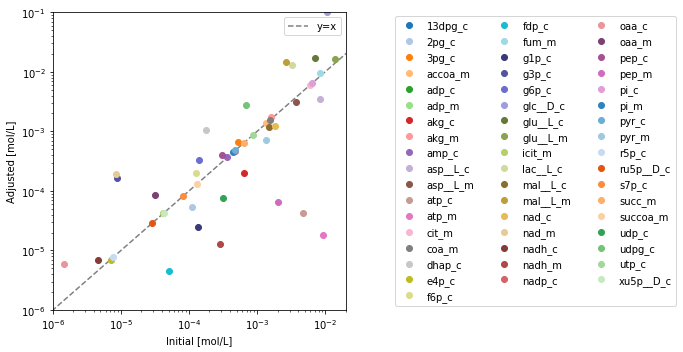

In [154]:
conc_comparison_fig, ax = plt.subplots(nrows=1, ncols=1,
                                       figsize=(5, 5))

plot_comparison(
    x=conc_df["Concentration (M)"], y=conc_solution,
    compare="concentrations",
    observable=[mid for mid in conc_df.index], ax=ax,
    legend="right outside", plot_function="loglog", 
    xlim=(1e-6,0.02), ylim=(1e-6,1e-1),
    xy_line=True,
    xy_legend="best", xlabel="Initial [mol/L]", ylabel="Adjusted [mol/L]")

conc_comparison_fig.tight_layout()
update_model_with_concentration_solution(
    liver, conc_solution, concentrations=True, inplace=True)

In [155]:
liver.calculate_PERCs(fluxes={
                r: v for r, v in liver.steady_state_fluxes.items()
                if not (r.boundary  
                       )
}, update_reactions=True)
# print(percs)                      

# print("Forward Rate Constants\n----------------------")
# for reaction in liver.reactions:
#     print("{0}: {1:.6f}".format(reaction.kf_str, reaction.kf))

{'kf_PEPtm': 1607120.52626947,
 'kf_PEPCKm': 76334337973315.23,
 'kf_PYK': 100000.0,
 'kf_PCm': 87487977.56995678,
 'kf_LDH_L': 51530.211980540655,
 'kf_PGMT': 4845.454653916301,
 'kf_GLPASE2': 25994.41986355754,
 'kf_GLDBRAN': 9.498835324034721e-06,
 'kf_GLBRAN': 1.0494999096613812e-08,
 'kf_GLPASE1': 0.022075043020391,
 'kf_GLGNS1': 9910.35552408978,
 'kf_GGNG': 8.109466103952047e+28,
 'kf_GALUi': 15934055.98990859,
 'kf_ADK1': 100000.0,
 'kf_NADH2_u10mi': 429756962090770.3,
 'kf_FADH2ETC': 1.7272086645517838e+19,
 'kf_CYOR_u10mi': 2.860324079851355e+19,
 'kf_CYOOm2i': 1.7195274330338113e+36,
 'kf_ATPS4mi': 1193.070031027916,
 'kf_Htmi': 100000.0,
 'kf_CSm': 917604.7240359078,
 'kf_ACONTm': 19.791474180974607,
 'kf_ICDHxm': 13730388.110101573,
 'kf_AKGDm': 213712395.7580145,
 'kf_SUCOASm': 677939.419740623,
 'kf_SUCD1m': 3379.498551916901,
 'kf_FUMm': 18.3805700991446,
 'kf_MDHm': 125410.24809355993,
 'kf_PDHm': 525955479.1839037,
 'kf_FBP': 46772.66042803513,
 'kf_MALtm': 100000.0,


In [156]:
#Function to add underscore in front of metabolite identifiers which start with a number
## fix this only after getting Keq from equlibrator because bigg doesn't have _13dpg for example
def prefix_number_id(id_str):
    """Prefix identifiers that start with numbers."""
    if re.match(r"^\d", id_str):
        id_str = "_" + id_str
    return id_str

In [157]:
#Loop to edit the names using "prefix_number_id" function defined earlier
for metabolite in liver.metabolites:
    new_met_id = prefix_number_id(metabolite.id)
    metabolite.id = new_met_id
liver.repair()

In [168]:
result = conc_solution.concentrations.get(key = 'o2_c')
  
# Print the result
print(result)

2.718281828459044e-10


In [166]:
type(conc_solution.concentrations)

pandas.core.series.Series

In [169]:
liver.boundary_conditions['co2_b']=0.657953 ##M
liver.boundary_conditions['gdp_b']=0.657953 ##M
liver.boundary_conditions['gtp_b']=1.519864 ##M
liver.boundary_conditions['o2_b']=2.718281828459044e-10 ##M
liver.boundary_conditions['h2o_b']=1 ##M
liver.boundary_conditions['h_b']=1 ##M
liver.boundary_conditions['hco3_b']=0.001827 ##M

In [170]:
qcqa_model(liver, parameters=True, concentrations=True,
           fluxes=True, superfluous=True, elemental=True)

╒══════════════════════════════════════════╕
│ MODEL ID: Core_Model                     │
│ SIMULATABLE: True                        │
│ PARAMETERS NUMERICALY CONSISTENT: True   │
╞══════════════════════════════════════════╡
╘══════════════════════════════════════════╛


Successfully loaded MassModel 'Core_Model' into RoadRunner.


mass\simulation\simulation.py:666 UserWarning: One or more simulations failed. Check the log for more details.
ERROR: Failed simulation for 'Core_Model' due the following error: CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In ?integrate@CVODEIntegrator@rr@@UEAANNN@Z
ERROR:mass.simulation.simulation:Failed simulation for 'Core_Model' due the following error: CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In ?integrate@CVODEIntegrator@rr@@UEAANNN@Z
mass\visualization\visualization_util.py:111 UserWarning: MassSolution 'Core_Model_ConcSols' does not contain any solutions.


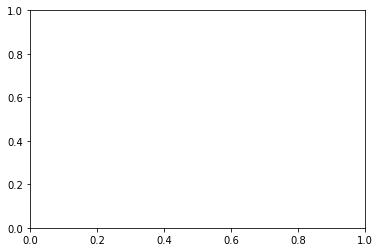

In [171]:
# Setup simulation object
simG=Simulation(liver, verbose=True)
# Simulate from 0 to 1000 with 10001 points in the output
conc_sol, flux_sol = simG.simulate(liver, time=(0, 1e8))
# Quickly render and display time profiles
conc_sol.view_time_profile()

In [ ]:
# Loading reaction data as JSON file to maintain data types as dictionaries 
model_json = os.path.join(model_dir,"Gly_Gluco_no_cmpt.json")
json.save_json_model(mass_model=liver, filename=model_json)